In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dc_stat_think as dcst
from datetime import timedelta
import dc_stat_think as dcst
import os
import warnings;warnings.filterwarnings('ignore');
os.chdir(r'C:\Users\Ravi\Downloads\Grover')

<b> ALL MERGED FILES

In [2]:
order = pd.read_csv("Order.csv",sep=",",parse_dates=['creation_date'])
category = pd.read_csv("category.csv",sep=",")
status = pd.read_csv("order_status.csv",sep=",")
country = pd.read_csv("country.csv",sep=",")

 # Merge data
data = pd.merge(order,category,how = 'left', left_on = 'category_id', right_on = 'id')
data = pd.merge(data,status,how = 'left', left_on = 'status_id', right_on = 'status_code')
data = pd.merge(data,country,how = 'left', left_on = 'country_id', right_on = 'id')
data = data[['Country','order_id','creation_date','category','status','order_value']]
data.head()

,Country,order_id,creation_date,category,status,order_value
0,Country 1,GHYt0/UnRN+7MrEE2OyZ+fXmURbaUBcDLVfTCHAS0Dc=,2020-03-25,Appliances,DECLINED,54.309623
1,Country 1,RG+ZjxjZ6a+RRsylicXP0mgaJ6ygEUnIyZINzepbGcY=,2020-05-20,Appliances,DECLINED,25.020920
2,Country 1,nAx18p6d7syuT4X9UaqNlndc2We44YtxaAbiKsJlkRs=,2020-04-30,Gaming,CANCELLED,23.347280
3,Country 1,3FkEK2/TO+Li0pE6k9x41tjULCoZZPloZ4L6hhxhFis=,2020-04-05,Furniture,DECLINED,58.493724
4,Country 1,yzmBgdSf6W0vG2u+vhjj2Q/2Byccd66DRCatbmnpm6E=,2020-04-15,Appliances,DECLINED,58.493724


<b> REMOVING ORDER VALUE OUTLIERS

total rows = 38541,   std =45.28  mean  46.588,  outliers = 292 rows


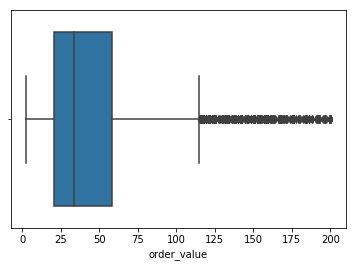

In [3]:
print( 'total rows = 38541,   std =45.28  mean  46.588,  outliers = 292 rows')
data.loc[data.order_value > 200, 'order_value'] = 200 

sns.boxplot(x = 'order_value', data = data)
plt.show()

<b>---------------------- COUNTRYWISE STATUS -------------------------

     Country     status  count  mean_order_value
0  Country 1   APPROVED    105         43.040446
1  Country 1  CANCELLED   5680         41.660263
2  Country 1   DECLINED  29714         46.272354
3  Country 2  CANCELLED    284         43.992280
4  Country 2   DECLINED   2663         47.911799
5  Country 3  CANCELLED      8         30.439331
6  Country 3   DECLINED     87         51.196076


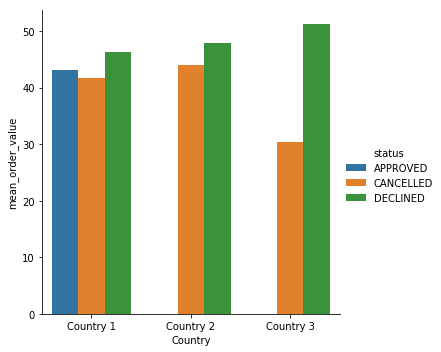

In [4]:
graph = data.groupby(['Country','status']).agg(count=('order_id','count'),mean_order_value=('order_value','mean')).reset_index()
print(graph)
sns.factorplot(kind = 'bar',data = graph, x= 'Country', y= 'mean_order_value', hue = 'status')
plt.show()

<b> COUNTRYWISE CATEGORY STATUS ORDER VALUE MEAN 

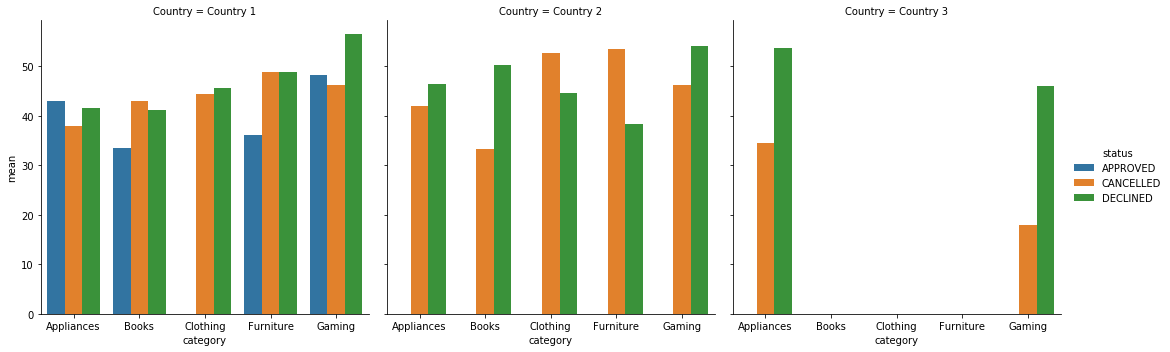

In [5]:
graph = data.groupby(['Country','category','status']).agg(mean=('order_value','mean')).reset_index()
sns.factorplot( x= 'category', y= 'mean', hue = 'status', col = 'Country',data = graph, kind = 'bar')
plt.show()

In country 1 and country 2
- No approved orders : May be due to unavailability of operations or suppliers
- Country 3 orders are placed for only Appliances and gaming
- Further Analysis is only done for country 1

<b> APPLICATIONS - ORDER VALUE EDF

      status  count  avg_value
0   APPROVED     69  43.084106
1  CANCELLED   3167  37.962646
2   DECLINED  18993  41.687937


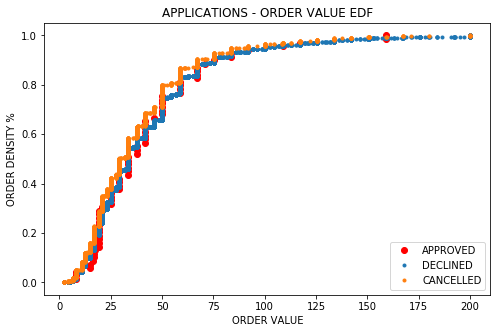

In [6]:
country1 = data[data.Country == 'Country 1']
cat = 'Appliances'
Appliances = country1[country1.category == cat ].groupby('status').agg(count=('order_id','count'),avg_value=('order_value','mean')).reset_index()
print(Appliances)

x_app,y_app = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'APPROVED'),'order_value'])
x_dec,y_dec = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'DECLINED'),'order_value'])
x_can,y_can = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'CANCELLED'),'order_value'])

# plotting ECDF
plt.plot(x_app,y_app,marker ='o', linestyle='none',color='red',label='APPROVED')
plt.plot(x_dec,y_dec,marker ='.', linestyle='none',label='DECLINED')
plt.plot(x_can,y_can,marker ='.', linestyle='none',label='CANCELLED')
 
plt.title("APPLICATIONS - ORDER VALUE EDF")
plt.xlabel('ORDER VALUE')
plt.ylabel('ORDER DENSITY %')
plt.legend()
plt.legend(loc = "lower right")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<b> BOOKS ORDER VALUE EDF

      status  count  avg_value
0   APPROVED      4  33.598326
1  CANCELLED    142  42.976604
2   DECLINED    757  41.151319


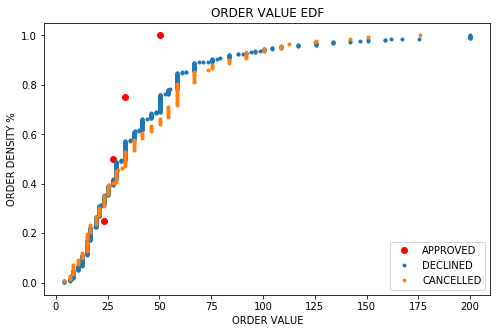

In [7]:
books = country1[country1.category =='Books' ].groupby('status').agg(count=('order_id','count'),avg_value=('order_value','mean')).reset_index()
print(books)

cat = 'Books'
x_app,y_app = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'APPROVED'),'order_value'])
x_dec,y_dec = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'DECLINED'),'order_value'])
x_can,y_can = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'CANCELLED'),'order_value'])

# plotting ECDF
plt.plot(x_app,y_app,marker ='o', linestyle='none',color='red',label='APPROVED')
plt.plot(x_dec,y_dec,marker ='.', linestyle='none',label='DECLINED')
plt.plot(x_can,y_can,marker ='.', linestyle='none',label='CANCELLED')
 
plt.title("ORDER VALUE EDF")
plt.xlabel('ORDER VALUE')
plt.ylabel('ORDER DENSITY %')
plt.legend()
plt.legend(loc = "lower right")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<b>CLOTHES ORDER VALUE EDF

      status  count  avg_value
0  CANCELLED     66  44.460505
1   DECLINED    388  45.699435


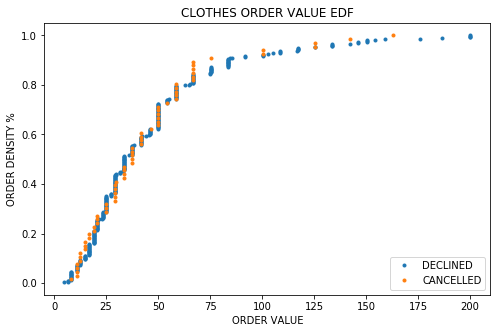

In [8]:

cloth = country1[country1.category =='Clothing' ].groupby('status').agg(count=('order_id','count'),avg_value=('order_value','mean')).reset_index()
print(cloth)

cat = 'Clothing'
# x_app,y_app = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'APPROVED'),'order_value'])
x_dec,y_dec = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'DECLINED'),'order_value'])
x_can,y_can = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'CANCELLED'),'order_value'])

# plotting ECDF
# plt.plot(x_app,y_app,marker ='o', linestyle='none',color='red',label='APPROVED')
plt.plot(x_dec,y_dec,marker ='.', linestyle='none',label='DECLINED')
plt.plot(x_can,y_can,marker ='.', linestyle='none',label='CANCELLED')
 
plt.title("CLOTHES ORDER VALUE EDF")
plt.xlabel('ORDER VALUE')
plt.ylabel('ORDER DENSITY %')
plt.legend()
plt.legend(loc = "lower right")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<b> FURNITURES ORDER VALUE EDF

      status  count  avg_value
0   APPROVED     11  36.196272
1  CANCELLED    241  48.855709
2   DECLINED    860  48.844896


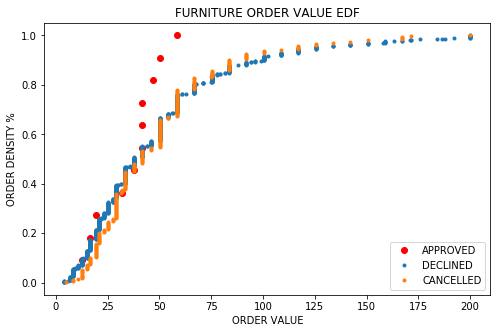

In [9]:

Furniture = country1[country1.category =='Furniture' ].groupby('status').agg(count=('order_id','count'),avg_value=('order_value','mean')).reset_index()
print(Furniture)

cat = 'Furniture'
x_app,y_app = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'APPROVED'),'order_value'])
x_dec,y_dec = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'DECLINED'),'order_value'])
x_can,y_can = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'CANCELLED'),'order_value'])

# plotting ECDF
plt.plot(x_app,y_app,marker ='o', linestyle='none',color='red',label='APPROVED')
plt.plot(x_dec,y_dec,marker ='.', linestyle='none',label='DECLINED')
plt.plot(x_can,y_can,marker ='.', linestyle='none',label='CANCELLED')
 
plt.title("FURNITURE ORDER VALUE EDF")
plt.xlabel('ORDER VALUE')
plt.ylabel('ORDER DENSITY %')
plt.legend()
plt.legend(loc = "lower right")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<b> GAMING ORDER VALUE ESTIMATED DENSITY

      status  count  avg_value
0   APPROVED     21  48.280534
1  CANCELLED   2064  46.313613
2   DECLINED   8716  56.478683


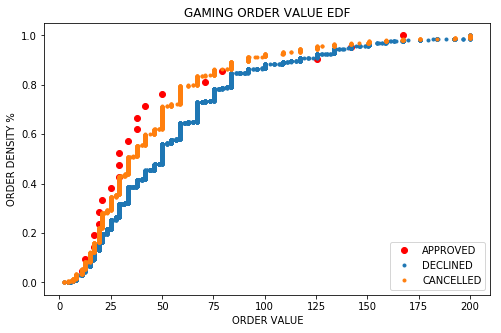

In [10]:

Gaming = country1[country1.category =='Gaming' ].groupby('status').agg(count=('order_id','count'),avg_value=('order_value','mean')).reset_index()
print(Gaming)

cat = 'Gaming'
x_app,y_app = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'APPROVED'),'order_value'])
x_dec,y_dec = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'DECLINED'),'order_value'])
x_can,y_can = dcst.ecdf(country1.loc[(country1.category == cat) & (country1.status == 'CANCELLED'),'order_value'])

# plotting ECDF
plt.plot(x_app,y_app,marker ='o', linestyle='none',color='red',label='APPROVED')
plt.plot(x_dec,y_dec,marker ='.', linestyle='none',label='DECLINED')
plt.plot(x_can,y_can,marker ='.', linestyle='none',label='CANCELLED')
 
plt.title("GAMING ORDER VALUE EDF")
plt.xlabel('ORDER VALUE')
plt.ylabel('ORDER DENSITY %')
plt.legend()
plt.legend(loc = "lower right")
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<b>  STATUS PERCENTAGE  

      status    percent
0   APPROVED   0.295783
1  CANCELLED  16.000451
2   DECLINED  83.703766


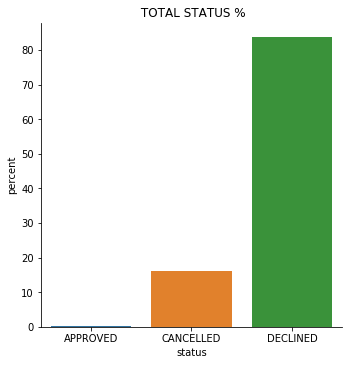

In [11]:
graph = country1.groupby('status').agg(percent=('order_id','count')).apply(lambda x: 100 * x / float(x.sum())).reset_index()
print(graph)
sns.factorplot(x= 'status', y= 'percent',data = graph, kind = 'bar')
plt.title(" TOTAL STATUS %")
plt.show()


<B> CATEGORYWISE STATUS PERCENTAGE

      category     status    percent
0   Appliances   APPROVED   0.282116
1   Appliances  CANCELLED  13.668329
2   Appliances   DECLINED  86.049554
3        Books   APPROVED   0.434783
4        Books  CANCELLED  15.652174
5        Books   DECLINED  83.913043
6     Clothing  CANCELLED  15.000000
7     Clothing   DECLINED  85.000000
8    Furniture   APPROVED   0.949094
9    Furniture  CANCELLED  21.397757
10   Furniture   DECLINED  77.653149
11      Gaming   APPROVED   0.182545
12      Gaming  CANCELLED  18.793463
13      Gaming   DECLINED  81.023992


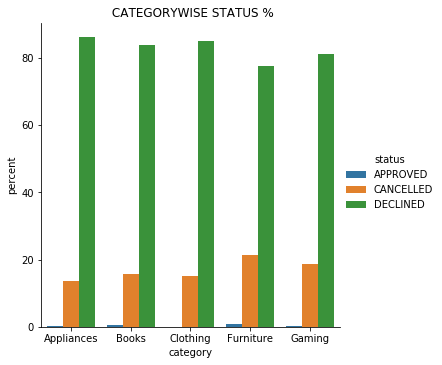

In [12]:
graph = data.groupby(['category','status']).agg(percent=('order_id','count')).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

print(graph)
sns.factorplot(kind = 'bar',data = graph, x= 'category', y= 'percent', hue = 'status')
plt.title(" CATEGORYWISE STATUS %")
plt.show()